# Line search in gradient and Newton directions

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import numpy as np

## Demo functions

In [3]:
def f1(x):
    return x[0]**2 + x[1]**2

In [4]:
def grad1(x):
    return np.array([2*x[0], 2*x[1]]).reshape([-1,1])

In [5]:
def hess1(x):
    return np.array([
        [2, 0],
        [0, 2]
    ])

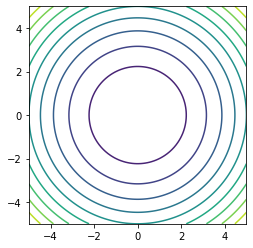

In [6]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 10)
plt.axis('square')
pass

In [7]:
np.c_[X.ravel(), Y.ravel()].shape

(10000, 2)

In [8]:
def f2(x):
    return x[0]**2 + 10*x[1]**2

In [9]:
def grad2(x):
    return np.array([2*x[0], 20*x[1]]).reshape([-1,1])

In [10]:
def hess2(x):
    return np.array([
        [2, 0],
        [0, 20]
    ])

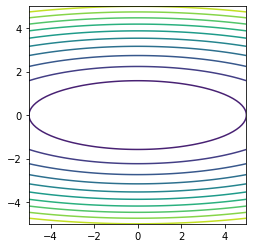

In [11]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 10*Y**2
plt.contour(X, Y, Z, 10)
plt.axis('square')
pass

## Gradient descent with step size found by numerical minimization

In [15]:
def gd(x, f, grad, max_iter=10):
    orbit = np.zeros((max_iter+1, len(x)))
    orbit[0] = x.ravel()
    for i in range(max_iter):
        res = minimize_scalar(lambda alpha: f(x - alpha * grad(x))) # Find optimal alpha
        alpha = res.x
        x = x - alpha * grad(x)
        orbit[i+1] = x.ravel()
    return orbit

## Gradient descent with analytic step size for quadratic function

In [12]:
def gd_alt(x, f, grad, hess, max_iter=10):
    orbit = np.zeros((max_iter+1, len(x)))
    orbit[0] = x.ravel()
    for i in range(max_iter):
        p = -grad(x)
        alpha = (p.T @ p)/(p.T @ hess(x) @ p)        
        x = x - alpha * grad(x)
        orbit[i+1] = x.ravel()
    return orbit

In [13]:
x0 = np.array([4,3]).reshape([-1,1])

In [16]:
orbit1 = gd(x0, f1, grad1, max_iter=5)

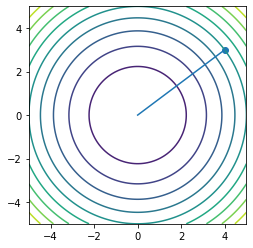

In [17]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 10)
plt.plot(orbit1[:, 0], orbit1[:, 1], '-')
plt.scatter(orbit1[0:1, 0], orbit1[0:1, 1])
plt.axis('square')
pass

In [18]:
orbit1a = gd_alt(x0, f1, grad1, hess1, max_iter=5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


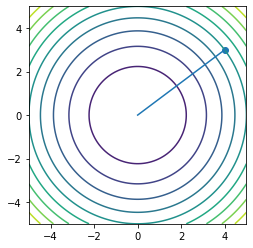

In [19]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 10)
plt.plot(orbit1a[:, 0], orbit1a[:, 1], '-')
plt.scatter(orbit1a[0:1, 0], orbit1a[0:1, 1])
plt.axis('square')
pass

In [20]:
orbit2 = gd(x0, f2, grad2, max_iter=5)

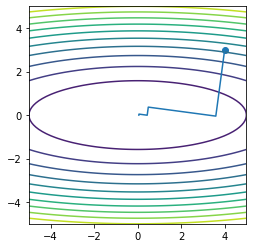

In [21]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 10*Y**2
plt.contour(X, Y, Z, 10)
plt.plot(orbit2[:, 0], orbit2[:, 1], '-')
plt.scatter(orbit2[0:1, 0], orbit2[0:1, 1])
plt.axis('square')
pass

In [22]:
orbit2a = gd_alt(x0, f2, grad2, hess2, max_iter=5)

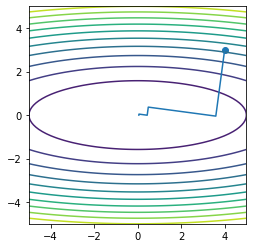

In [23]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 10*Y**2
plt.contour(X, Y, Z, 10)
plt.plot(orbit2a[:, 0], orbit2a[:, 1], '-')
plt.scatter(orbit2a[0:1, 0], orbit2a[0:1, 1])
plt.axis('square')
pass

## Line search in Newton direction with analytic step size

In [24]:
def newton(x, f, grad, hess, max_iter=5):
    orbit = np.zeros((max_iter+1, len(x)))
    orbit[0] = x.ravel()
    for i in range(max_iter):
        x = x - np.linalg.inv(hess(x)) @ grad(x)
        orbit[i+1] = x.ravel()
    return orbit

In [25]:
orbit3 = newton(x0, f1, grad1, hess1, max_iter=5)

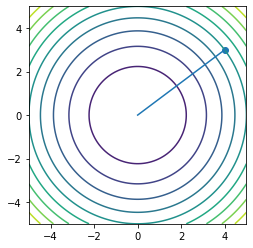

In [26]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contour(X, Y, Z, 10)
plt.plot(orbit3[:, 0], orbit3[:, 1], '-')
plt.scatter(orbit3[0:1, 0], orbit3[0:1, 1])
plt.axis('square')
pass

In [27]:
orbit4 = newton(x0, f2, grad2, hess2, max_iter=5)

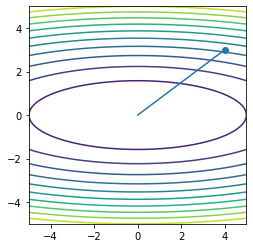

In [28]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 10*Y**2
plt.contour(X, Y, Z, 10)
plt.plot(orbit4[:, 0], orbit4[:, 1], '-')
plt.scatter(orbit4[0:1, 0], orbit4[0:1, 1])
plt.axis('square')
pass